# AIDM7330 Basic Programming for Data Science

# Google Job Skill Analysis

## Install wordcloud and nltk package
For this tutorial we need to install the `wordcloud` and `NLTK` library.

In [1]:
# Install required packages using pip package manager in the current Jupyter kernel
import sys
!{sys.executable} -m pip install wordcloud#generated wordclouds
!{sys.executable} -m pip install nltk#library

In [2]:
#NumPy, Pandas
import numpy as np
import pandas as pd

#Visualisation
#MatPlotLib
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)#how many column in the dataset

In [3]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


In [4]:
# Install the library on your environment
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=eeea3dd7b486fcfb515c8ecf68e6c280413854e632e2a1b27d7784d519c31fa8
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [5]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/pmengoni/AIDM7330-2223S1/main/'
doc = 'job_skills.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
fileName = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(fileName)

/content/drive/MyDrive/Colab Notebooks/data/job_skills.csv


In [6]:
df = pd.read_csv(fileName)

In [7]:
df.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expectations and rationale on deliverables for stakeholders and program contributors.\nProvide program performance feedback to teams in Product, Engineering, Sales, and Marketing (among others) to enable efficient cross-team operations.","BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.","Experience in the business technology market as a program manager in SaaS, cloud computing, and/or emerging technologies.\nSignificant cross-functional experience across engineering, sales, and marketing teams in cloud computing or related technical fields.\nProven successful program outcomes from idea to launch in multiple contexts throughout your career.\nAbility to manage the expectations, demands and priorities of multiple internal stakeholders based on overarching vision and success for global team health.\nAbility to work under pressure and possess flexibility with changing needs and direction in a rapidly-growing organization.\nStrong organization and communication skills."


## Data Cleaning

### Example 1
    Follow along these steps:#assume our data is dirty

    1. Check how many items are null for each column
    2. drop the rows containing null value

In [8]:
# check null value
pd.isnull(df).sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum_Qualifications      14
Preferred_Qualifications    14
dtype: int64

In [9]:
# drop null value
df = df.dropna(how='any',axis='rows')#or how='all'

### Example 2
    Check the value_counts of each column:
    1. Check the value_counts of 'Company' and rows with 'Company' other than Google
    2. Show the value_counts of the first 10 items for 'Title', 'Location' and 'Category'
    3. Create a new column called 'CountryAndRegion' by extracting country/region info from 'Location'. Count the value after creation and show the first 10 items.

In [10]:
# check Company,how many company
df.Company.value_counts()

Google     1212
YouTube      23
Name: Company, dtype: int64

In [11]:
#Drop YouTube
df = df[df.Company != 'YouTube']

In [12]:
df.Title.value_counts()[:10]

Business Intern 2018                          35
MBA Intern, Summer 2018                       34
MBA Intern 2018                               28
BOLD Intern, Summer 2018                      21
Field Sales Representative, Google Cloud      17
Interaction Designer                          12
User Experience Researcher                     9
Recruiter                                      7
User Experience Design Intern, Summer 2018     7
Partner Sales Engineer, Google Cloud           7
Name: Title, dtype: int64

In [13]:
df.Location.value_counts()[:10]

Mountain View, CA, United States    187
Sunnyvale, CA, United States        155
Dublin, Ireland                      87
New York, NY, United States          68
London, United Kingdom               61
San Francisco, CA, United States     49
Singapore                            39
Tokyo, Japan                         31
Sydney, Australia                    31
Seattle, WA, United States           27
Name: Location, dtype: int64

In [14]:
df.Category.value_counts()[:10]

Sales & Account Management    167
Marketing & Communications    161
Finance                       112
Technical Solutions           100
Business Strategy              92
People Operations              86
User Experience & Design       83
Program Management             72
Partnerships                   58
Product & Customer Support     48
Name: Category, dtype: int64

In [17]:
def splitting(x):
    tempX = x.split(',')[-1] # Sunnyvale, CA, USA => [Sunnyvale, CA, USA]
    return tempX#get the last element,the info of country and region

In [19]:
# Extract only the left part of the location (after , )
df['CountryAndRegion'] = df['Location'].apply(lambda x : splitting(x))#lamba: the content of the function,lamba splitting x,you don't need to reuse split
#df['CountryAndRegion'] = df['Location'].apply(lambda x : x.split(',')[-1])
df.CountryAndRegion.value_counts()[:10]#apply means apply the function to all the character

 United States     607
 Ireland            87
 United Kingdom     61
 Germany            53
Singapore           39
 China              38
 Australia          35
 Japan              31
 Taiwan             30
 India              27
Name: CountryAndRegion, dtype: int64

### Example 3
    
    Now please extract some features from the 'Responsibilities', 'Minimum_Qaulifications' and 'Prefered_Qualifactions', you could use the Natural Language Toolkit 'nltk' to work with the following tasks:
    1. tokenize the value of each fields（like we cannot split hongkong to hong and kong
    2. drop all stopwords(a,the for...
    3. join the cleaned result by blankspace

In [20]:
#download resources from NLTK
import nltk
nltk.download('stopwords') #stopwords
nltk.download('punkt') #punctuation

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize #keep together


stopWords = set(stopwords.words('english'))

df['Responsibilities'] = df.Responsibilities.apply(lambda x: word_tokenize(x)) # ['The','Job','New York'...]
df['Responsibilities'] = df.Responsibilities.apply(lambda x: [w for w in x if w not in stopWords]) # ['Job','New York'...]
df['Responsibilities'] = df.Responsibilities.apply(lambda x: ' '.join(x)) # Job New York,concatenate with space

df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: word_tokenize(x))
df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: [w for w in x if w not in stopWords])
df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: ' '.join(x))

df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: word_tokenize(x))
df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: [w for w in x if w not in stopWords])
df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: ' '.join(x))

df.head(1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,CountryAndRegion
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape , shepherd , ship , show technical programs designed support work Cloud Customer Engineers Solutions Architects . Measure report key metrics tied programs identify need change course , cancel , scale programs regional global platform . Communicate status identify obstacles paths resolution stakeholders , including senior roles , transparent , regular , professional timely manner . Establish expectations rationale deliverables stakeholders program contributors . Provide program performance feedback teams Product , Engineering , Sales , Marketing ( among others ) enable efficient cross-team operations .","BA/BS degree equivalent practical experience . 3 years experience program and/or project management cloud computing , enterprise software and/or marketing technologies .","Experience business technology market program manager SaaS , cloud computing , and/or emerging technologies . Significant cross-functional experience across engineering , sales , marketing teams cloud computing related technical fields . Proven successful program outcomes idea launch multiple contexts throughout career . Ability manage expectations , demands priorities multiple internal stakeholders based overarching vision success global team health . Ability work pressure possess flexibility changing needs direction rapidly-growing organization . Strong organization communication skills .",Singapore


### Example 4
    
    Now please create a column called 'Minimum_years_experience' by performing the following steps:
    1. Find out the requirement for minimum year experience from 'Minimum_Qualifications' using proper regular expression.
    2. If no minimum year requirement found, use 0 for the field.(we don't use NaN,use 0
    3. If more than one minimum year requirement found, use the minimum one.
    4. Transform the data type into integer

In [21]:
import re
df['Minimum_years_experience'] = df['Minimum_Qualifications'].apply(lambda x : re.findall(r'([0-9]+) year',x))#[0-9]+ means finad number0-9 followed by0-9...,until the space we stop
# Fill empty list with [0]
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda y : [0] if len(y)==0 else y)
#Then extract maximum in the list to have the work experience requirement
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda z : min(z))
df['Minimum_years_experience'] = df.Minimum_years_experience.astype(int)

df.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,CountryAndRegion,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape , shepherd , ship , show technical programs designed support work Cloud Customer Engineers Solutions Architects . Measure report key metrics tied programs identify need change course , cancel , scale programs regional global platform . Communicate status identify obstacles paths resolution stakeholders , including senior roles , transparent , regular , professional timely manner . Establish expectations rationale deliverables stakeholders program contributors . Provide program performance feedback teams Product , Engineering , Sales , Marketing ( among others ) enable efficient cross-team operations .","BA/BS degree equivalent practical experience . 3 years experience program and/or project management cloud computing , enterprise software and/or marketing technologies .","Experience business technology market program manager SaaS , cloud computing , and/or emerging technologies . Significant cross-functional experience across engineering , sales , marketing teams cloud computing related technical fields . Proven successful program outcomes idea launch multiple contexts throughout career . Ability manage expectations , demands priorities multiple internal stakeholders based overarching vision success global team health . Ability work pressure possess flexibility changing needs direction rapidly-growing organization . Strong organization communication skills .",Singapore,3


## Exploratory Analysis

### Example 5
    
    Explore the degree requirement of Google by performing the following steps:
    1. Specify a list of degrees you aim to explore
    2. Find out how many entries include the the degree you specified and build a dictionary
    3. Plot the Degree distribution

In [25]:
degree = ['BA','BS','Bachelor','MBA','Master','PhD']

degreeCount = dict((x,0) for x in degree)#we generate dict{BA:0,BS:0...}
for i in degree:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in degreeCount:
        degreeCount[i] = x

print(degreeCount)

{'BA': 890, 'BS': 860, 'Bachelor': 163, 'MBA': 71, 'Master': 80, 'PhD': 8}


Text(0.5, 0, 'Count')

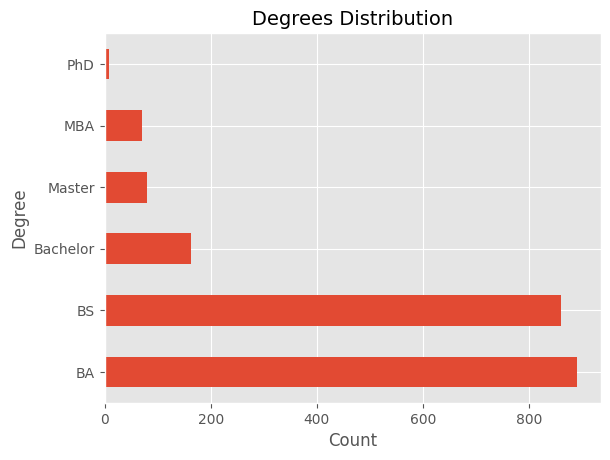

In [26]:
degreeRequirement = sorted(degreeCount.items(), key=lambda x: x[1], reverse=True)#x: x[1]:sorted by the first element in the dict
degree = pd.DataFrame(degreeRequirement,columns=['Degree','Count'])
degree['Count'] = degree.Count.astype('int')
degree

degree.plot.barh(x='Degree',y='Count',legend=False)
plt.title('Degrees Distribution',fontsize=14)
plt.xlabel('Count')

### Example 6
    
    Draw a countplot for the minimum years experiece, using seaborn

Text(0.5, 0.98, 'Minimum work experience')

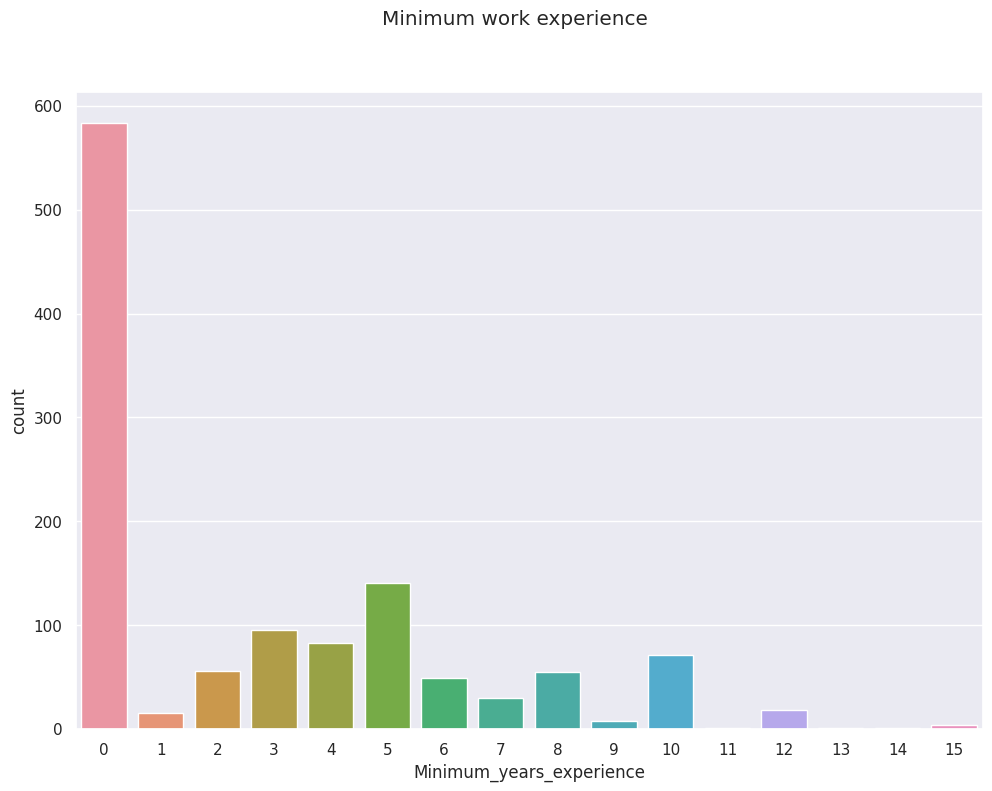

In [33]:
sns.countplot(x='Minimum_years_experience',data=df)
plt.suptitle('Minimum work experience')

## Word Cloud Visualization

### Example 7

    Name a new dataframe called 'dfAnalyst' by selecting rows whose "Title' field containing keywords 'Analyst'.
    All the visualizations are supposed to perform on 'dfAnalyst'.

In [28]:
# create new dataframe
dfAnalyst = df.loc[df.Title.str.contains('Analyst').fillna(False)]# fill NaN
dfAnalyst.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,CountryAndRegion,Minimum_years_experience
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"New York, NY, United States","Collect analyze data draw insight identify strategic solutions . Build consensus facilitating broad collaboration clear communication documentation . Work cross-functional stakeholders gather requirements , manage implementation , drive delivery projects .","Bachelor ’ degree Business , Economics , Statistics , Operations Research related analytical field , equivalent practical experience . 2 years work experience business analysis . 1 year experience statistical modeling , forecasting machine learning . Experience R , SAS Python . 1 year experience developing manipulating large datasets .",Experience partnering consulting cross-functionally senior stakeholders . Proficiency database query language ( e.g . SQL ) . Ability manage multiple projects ambiguous environment . Strong presentation communication skills ability communicate statistical concepts explain recommendations non-experts .,United States,1


### Example 8

    Create a word cloud for the 'Responsibilities'. You could refer to the following steps:
    1. Create a collection of responsibilities joining all rows
    2. Use the 'wordcloud' library to generate the word cloud
    3. Configure the plot and show the result

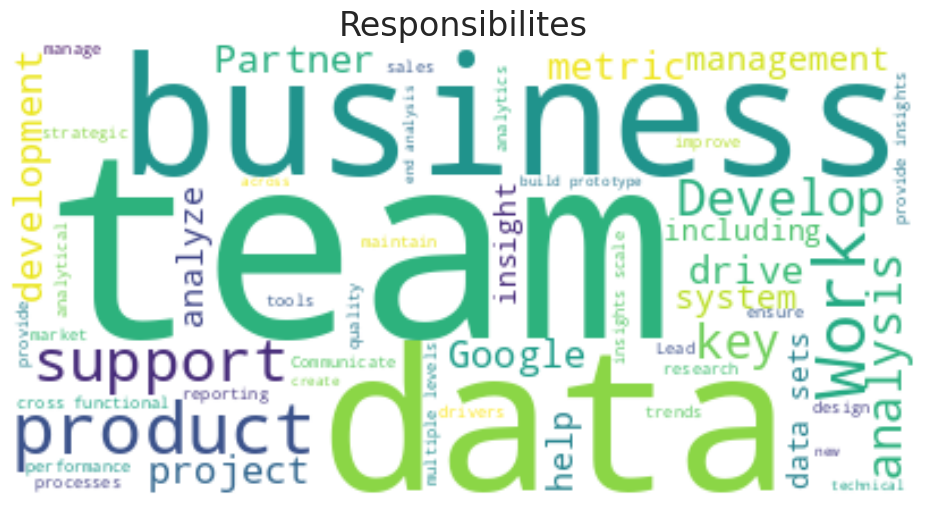

In [29]:
ResAN = ' '.join(dfAnalyst['Responsibilities'].tolist())

from wordcloud import WordCloud, ImageColorGenerator
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(background_color="white").generate(ResAN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")#we don't want x and y
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()

### Example 9

    In the same way, create a word cloud for 'Minimum_Qualifications' and 'Preferred_Qualifications' separately and add a mask you like.
    Hint: Not all images are suitable as a mask, please find out the requirement for mask image.

In [30]:
# Download the image masks

# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/pmengoni/AIDM7330-2223S1/main/'
images = ['cloud_mask.png', 'twitter_mask.png']


dataPath = drivePath + '/MyDrive/Colab Notebooks/data/'

for img in images:
  # Download the file
  fullURL = baseURL + img
  fileName = wget.download(fullURL, out=dataPath)

  # Print the file name including the local path
  print(fileName)

/content/drive/MyDrive/Colab Notebooks/data//cloud_mask.png
/content/drive/MyDrive/Colab Notebooks/data//twitter_mask.png


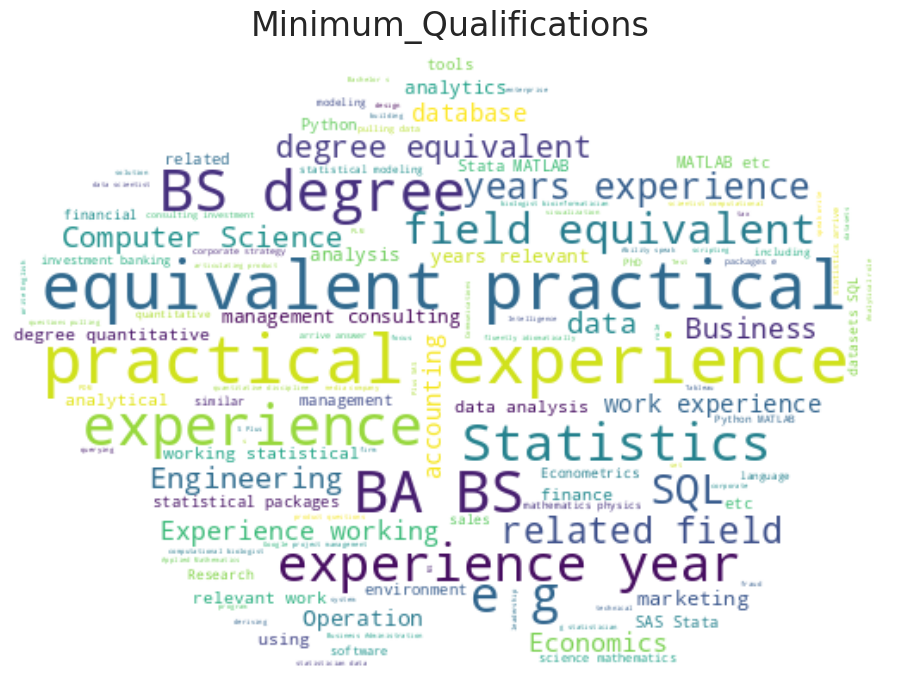

In [31]:
from PIL import Image

cloud = np.array(Image.open(dataPath + 'cloud_mask.png'))
# the image must be black-shaped to be a mask
sns.set(rc={'figure.figsize':(11.7,8.27)})

QuaAN = ' '.join(dfAnalyst['Minimum_Qualifications'].tolist())

wordcloud = WordCloud(mask=cloud,background_color="white").generate(QuaAN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Minimum_Qualifications',size=24)
plt.show()

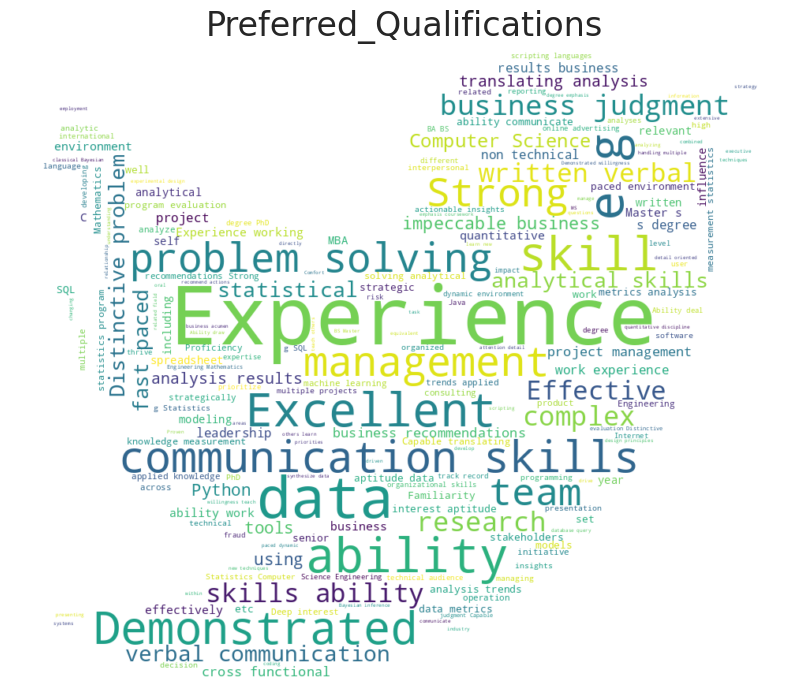

In [32]:
twitter = np.array(Image.open(dataPath + 'twitter_mask.png'))
# the image must be black-shaped to be a mask
sns.set(rc={'figure.figsize':(11.7,8.27)})

PreQuaAN = ' '.join(dfAnalyst['Preferred_Qualifications'].tolist())

wordcloud = WordCloud(mask=twitter,background_color="white").generate(PreQuaAN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Preferred_Qualifications',size=24)
plt.show()